# Getting Started With The SkillCorner Analysis Toolkit

This notebook gives a basic overview of how to use the bar, scatter & swarm/violin plot functions.

## 1. Importing Required Packages

In [1]:
%pip install pandas
%pip install skillcorner
%pip install git+https://github.com/liamMichaelBailey/skillcorner_analysis_toolkit.git

Error processing line 1 of /Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/Users/liambailey/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Note: you may need to restart the kernel to use updated packages.
Error processing line 1 of /Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/Users/liambailey/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Note: you may need to restart the kernel to use updated packages.
Error processing line 1 of /Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/distutils-prece

In [2]:
import pandas as pd
from skillcorner.client import SkillcornerClient
from skillcorner_analysis_toolkit.skillcorner_plots import plot_bar_chart, plot_scatter, plot_swarm_violin
from skillcorner_analysis_toolkit.skillcorner_normalisations import get_per_30_tip, get_per_100
from skillcorner_analysis_toolkit.constants import *

## 2. Requesting Game Intelligence Off-Ball Run Data
- Add your SkillCorner API credentials (used to access the Web Query Tool) & update the request to a competition/season you have access to.

In [3]:
USERNAME = ''
PASSWORD = ''
client = SkillcornerClient(username=USERNAME, password=PASSWORD)
df = pd.DataFrame(client.get_in_possession_off_ball_runs(params={'run_type': ','.join(REQUEST_RUN_TYPES),
                                                                 'season': 21,
                                                                 'competition': 1,
                                                                 'count_match__gte': 8,
                                                                 'playing_time__gte': 60,
                                                                 'group_by': 'player,team,competition,group,position',
                                                                 'average_per': 'match'}))

In [4]:
df.head()

,player_id,player_name,player_birthdate,team_id,team_name,competition_id,competition_name,position,group,third,...,count_dangerous_cross_receiver_runs_per_match,cross_receiver_runs_threat_per_match,count_cross_receiver_runs_leading_to_goal_per_match,count_cross_receiver_runs_targeted_per_match,count_cross_receiver_runs_received_per_match,count_cross_receiver_runs_leading_to_shot_per_match,cross_receiver_runs_targeted_threat_per_match,cross_receiver_runs_received_threat_per_match,count_dangerous_cross_receiver_runs_targeted_per_match,count_dangerous_cross_receiver_runs_received_per_match
0,10253,Thiago Silva,1984-09-22,49,Chelsea,1,Premier League,CB,Central Defender,all,...,0.08,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1102,Ashley Young,1985-07-09,39,Aston Villa,1,Premier League,RWB,Full Back,all,...,0.18,0.02,0.00,0.06,0.00,0.00,0.01,0.00,0.06,0.00
2,5071,Joao Moutinho,1986-09-08,52,Wolverhampton Wanderers,1,Premier League,LM,Midfield,all,...,0.70,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4700,Jamie Vardy,1987-01-11,62,Leicester City,1,Premier League,CF,Forward,all,...,6.41,0.54,0.06,1.35,0.29,0.12,0.10,0.02,1.35,0.29
4,10373,Tim Ream,1987-10-05,48,Fulham,1,Premier League,LCB,Central Defender,all,...,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 3. Plotting A Bar Chart
- Update the primary_highlight_group parameter to include players you are interested in.

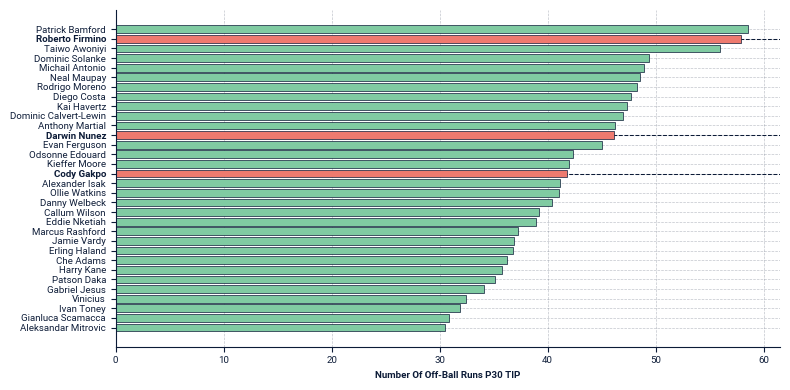

In [5]:
df['count_runs_per_30_tip'] = get_per_30_tip(df, 'count_runs_per_match')

fig, ax = plot_bar_chart(df=df[df['position'] == 'CF'],
                         x_metric='count_runs_per_30_tip',
                         x_label='Number Of Off-Ball Runs P30 TIP',
                         primary_highlight_group=['Roberto Firmino',
                                                  'Darwin Nunez',
                                                  'Cody Gakpo'])

fig.savefig('center_forward_run_volume.png', format='png', dpi=300)

## 4. Plotting A Scatter Plot
- Update the primary_highlight_group parameter to include players you are interested in.
- Adjust the x_sd_factor & y_sd_factor to highlight more or fewer players around the edge.

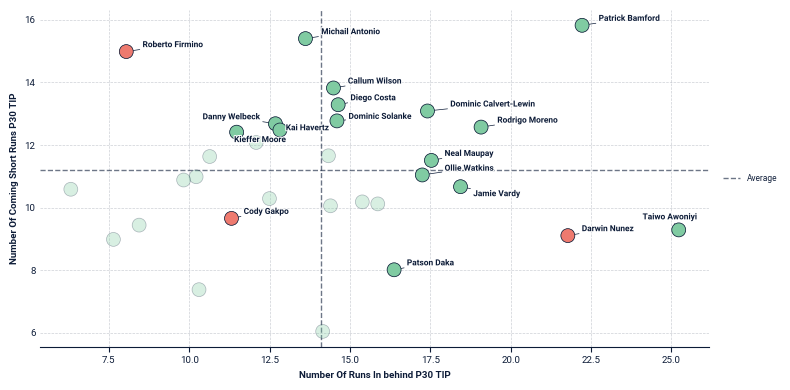

In [6]:
df['count_cross_receiver_runs_per_30_tip'] = get_per_30_tip(df, 'count_cross_receiver_runs_per_match')
df['count_runs_in_behind_per_30_tip'] = get_per_30_tip(df, 'count_runs_in_behind_per_match')

fig, ax = plot_scatter(df=df[df['position'] == 'CF'],
                       x_metric='count_runs_in_behind_per_30_tip',
                       y_metric='count_cross_receiver_runs_per_30_tip',
                       x_label='Number Of Runs In behind P30 TIP',
                       y_label='Number Of Coming Short Runs P30 TIP',
                       x_sd_highlight=.5,
                       y_sd_highlight=.5,
                       primary_highlight_group=['Roberto Firmino',
                                            'Darwin Nunez',
                                            'Cody Gakpo'])

fig.savefig('center_forward_run_profile.png', format='png', dpi=300)

## 5. Plotting A Swarm/Violin Plot
- Calculate the average threat per 100 runs for the run types you are interested in.
- Melt the dataframe, so we have a column of metric names & a column of values.

Note for general usage of the swarm/violin plot: the y_metric should always be a categorical column & y_groups a list of categories within the column we want to include. In this case we have re-structured the data, so we have a categorical column of metrics names.

In [7]:
df['threat_per_100_cross_receiver_runs'] = get_per_100(df=df,
                                                       metric_per_match='cross_receiver_runs_threat_per_match',
                                                       adjustment_metric_per_match='count_cross_receiver_runs_per_match')

df['threat_per_100_runs_in_behind'] = get_per_100(df=df,
                                                       metric_per_match='runs_in_behind_threat_per_match',
                                                       adjustment_metric_per_match='count_runs_in_behind_per_match')

df['threat_per_100_runs_ahead_of_the_ball'] = get_per_100(df=df,
                                                       metric_per_match='runs_ahead_of_the_ball_threat_per_match',
                                                       adjustment_metric_per_match='count_runs_ahead_of_the_ball_per_match')

melted_df = df.melt(id_vars=["player_id",
                             "player_name",
                             "player_birthdate",
                             "team_id",
                             "team_name",
                             "competition_id",
                             "competition_name",
                             "group",
                             "position",
                             "third",
                             "channel",
                             "minutes_played_per_match",
                             "count_match",
                             "count_match_failed"],
                    var_name="metric",
                    value_name="value")

x_value = 'value'  # This should remain as 'value'.
y_value = 'metric'  # This should remain as 'metric'.

In [8]:
melted_df.head()

,player_id,player_name,player_birthdate,team_id,team_name,competition_id,competition_name,group,position,third,channel,minutes_played_per_match,count_match,count_match_failed,metric,value
0,10253,Thiago Silva,1984-09-22,49,Chelsea,1,Premier League,Central Defender,CB,all,all,99.06,12,0,adjusted_min_tip_per_match,24.40
1,1102,Ashley Young,1985-07-09,39,Aston Villa,1,Premier League,Full Back,RWB,all,all,87.86,17,0,adjusted_min_tip_per_match,19.31
2,5071,Joao Moutinho,1986-09-08,52,Wolverhampton Wanderers,1,Premier League,Midfield,LM,all,all,87.47,10,0,adjusted_min_tip_per_match,19.10
3,4700,Jamie Vardy,1987-01-11,62,Leicester City,1,Premier League,Forward,CF,all,all,83.43,17,0,adjusted_min_tip_per_match,18.19
4,10373,Tim Ream,1987-10-05,48,Fulham,1,Premier League,Central Defender,LCB,all,all,98.83,31,0,adjusted_min_tip_per_match,21.30


/Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:627: RuntimeWarning: invalid value encountered in double_scalars
  deltaw = (sw * width - width) / 2.0
/Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:628: RuntimeWarning: invalid value encountered in double_scalars
  deltah = (sh * height - height) / 2.0
/Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:627: RuntimeWarning: invalid value encountered in double_scalars
  deltaw = (sw * width - width) / 2.0
/Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:628: RuntimeWarning: invalid value encountered in double_scalars
  deltah = (sh * height - height) / 2.0
/Users/liambailey/opt/anaconda3/lib/python3.9/site-packages/matplotlib/transforms.py:627: RuntimeWarning: invalid value encountered in double_scalars
  deltaw = (sw * width - width) / 2.0
/Users/liambailey/opt/anaconda3/lib/python3.9/site-packa

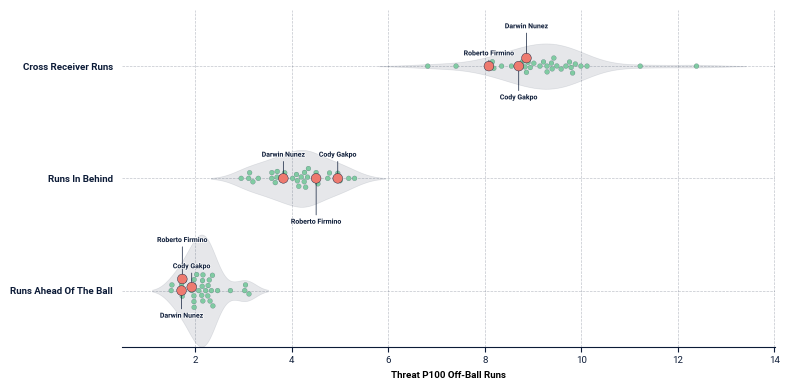

In [9]:
fig, ax = plot_swarm_violin(df=melted_df[melted_df['position'] == 'CF'],
                      x_metric=x_value,
                      y_metric=y_value,
                      y_groups=['threat_per_100_cross_receiver_runs',
                                'threat_per_100_runs_in_behind',
                                'threat_per_100_runs_ahead_of_the_ball'],
                      x_label='Threat P100 Off-Ball Runs',
                      y_group_labels=['Cross Receiver Runs',
                                      'Runs In Behind',
                                      'Runs Ahead Of The Ball'],
                      primary_highlight_group=['Roberto Firmino',
                                               'Darwin Nunez',
                                               'Cody Gakpo'])

fig.savefig('center_forward_run_threat.png', format='png', dpi=300, transparent=False, facecolor='w')